## Pyfesom2 Overview

Pyfesom2 is python model for working with FESOM2 data. The FESOM2 is different from other ocean models by supporting unstructured triangular meshes of variable resolution. 


<img src="fig_geometry.png" width="500">



The mesh is defined as a collection of points (vertices, or nodes) shown as blue dots, and connections between this points. More details about the geometry: https://fesom2.readthedocs.io/en/latest/geometry.html and mesh itself: https://fesom2.readthedocs.io/en/latest/meshes/meshes.html 

## Download and installation

### pyfesom2

GitHub: https://github.com/FESOM/pyfesom2

Installation instructions: https://github.com/FESOM/pyfesom2/blob/master/README.md

### Data and mesh

If you would like to try to repeat examples from this introduction, you can download FESOM2 data and mesh. The data are quite heavy, about 1.5Gb in bzip2 archive.

Link: https://swiftbrowser.dkrz.de/public/dkrz_c719fbc3-98ea-446c-8e01-356dac22ed90/PYFESOM2/

You have to download `LCORE2.tar` and `core2.tar.bz2` archives and extract them.


Alternative would be to use very light weight mesh that comes with pyfesom2 in the `tests/data/pi-grid/` and example data on this mesh in `tests/data/pi-results`.

## Command line utulities

Most of the visualisation tools, like `ncview`, work with gridded regular data. We can interpolate FESOM2 data to regular grid to make use of all this tools. Many analysis can be also done with gridded data. If pyfesom is installed with `pip install -e .`, you will have two comand line tools available:

    pfinterp
    pfplot
    

### pfinterp

The most useful for most people would be the `pfinterp`. As a minimum you should provide path to the mesh, path to the model ouptut and a variable name:

    pfinterp  /path/to/mesh/ /path/to/datafolder/ temp

by default pfinterp will search for the year 1948 and interpolate first time step from the depth 0 to a 1$^\circ$ lon/lat regular grid.

    pfinterp /Users/koldunovn/PYHTON/DATA/LCORE_MESH /Users/koldunovn/PYHTON/DATA/LCORE temp

Examples:

    pfinterp /Users/koldunovn/PYHTON/DATA/LCORE_MESH /Users/koldunovn/PYHTON/DATA/LCORE temp -b -90 0 20 60 -r 360 160
    pfinterp /Users/koldunovn/PYHTON/DATA/LCORE_MESH /Users/koldunovn/PYHTON/DATA/LCORE temp -y 1950:1952 -d 0,100,500 -r 1440 720 -i 40000 --interp idist -k 5 -o ./output.nc
    
    # intepolates also vector values
    pfinterp /Users/koldunovn/PYHTON/DATA/LCORE_MESH /Users/koldunovn/PYHTON/DATA/LCORE u -y 1950 -d 100 -o ./u.nc
    
    # fast
    pfinterp /Users/koldunovn/PYHTON/DATA/LCORE_MESH /Users/koldunovn/PYHTON/DATA/LCORE a_ice -y 1950:1952 -d 0 -r 1440 720 -i 120000  -o ./a_ice.nc
    
Documentation: https://pyfesom2.readthedocs.io/en/latest/pfinterp.html

### pfplot

Plots scalar from FESOM mesh interpolated on regular grid. Sometimes can be usefull if you need to explore the data a bit more interactivelly.

Examples:

    pfplot /Users/koldunovn/PYHTON/DATA/LCORE_MESH /Users/koldunovn/PYHTON/DATA/LCORE temp -y 1950:1952 -d 0 -r 1440 720 -i 120000 --interp nn
    
Documentation: https://pyfesom2.readthedocs.io/en/latest/pfplot.html

## pyfesom2 basic functionality

In [1]:
import pyfesom2 as pf
import numpy as np
import matplotlib.pylab as plt
import matplotlib.cm as cm

osgeo is not installed, conversion to Geo formats like Geotiff (fesom2GeoFormat) will not work.


In [2]:
mesh = pf.load_mesh('/work/ab0246/a270092/input/fesom2/core2/')
datapath = "/work/bb1469/a270092/runtime/awicm3-develop/RNF+ALB+RAD/outdata/fesom/"

/work/ab0246/a270092/input/fesom2/core2/pickle_mesh_py3_fesom2
The usepickle == True)
The pickle file for FESOM2 exists.
The mesh will be loaded from /work/ab0246/a270092/input/fesom2/core2/pickle_mesh_py3_fesom2


In [3]:
mesh


FESOM mesh:
path                  = /work/ab0246/a270092/input/fesom2/core2
alpha, beta, gamma    = 0, 0, 0
number of 2d nodes    = 126858
number of 2d elements = 244659

        

### getting the data

In [22]:
data = pf.get_data(datapath, "m_snow", range(2040,2041), mesh, how=None, compute=False)

Depth is None, 3d field will be returned


In [23]:
data

<xarray.DataArray 'm_snow' (time: 12, nod2: 126858)>
dask.array<open_dataset-m_snow, shape=(12, 126858), dtype=float32, chunksize=(12, 126858), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2040-01-31T23:30:00 ... 2040-12-31T23:30:00
Dimensions without coordinates: nod2
Attributes:
    description:  snow height per unit area
    long_name:    snow height per unit area
    units:        m
    location:     node
    mesh:         fesom_mesh

In [24]:
data_mean = data.mean(dim='time').compute()

## Plotting

[<GeoAxes: >]

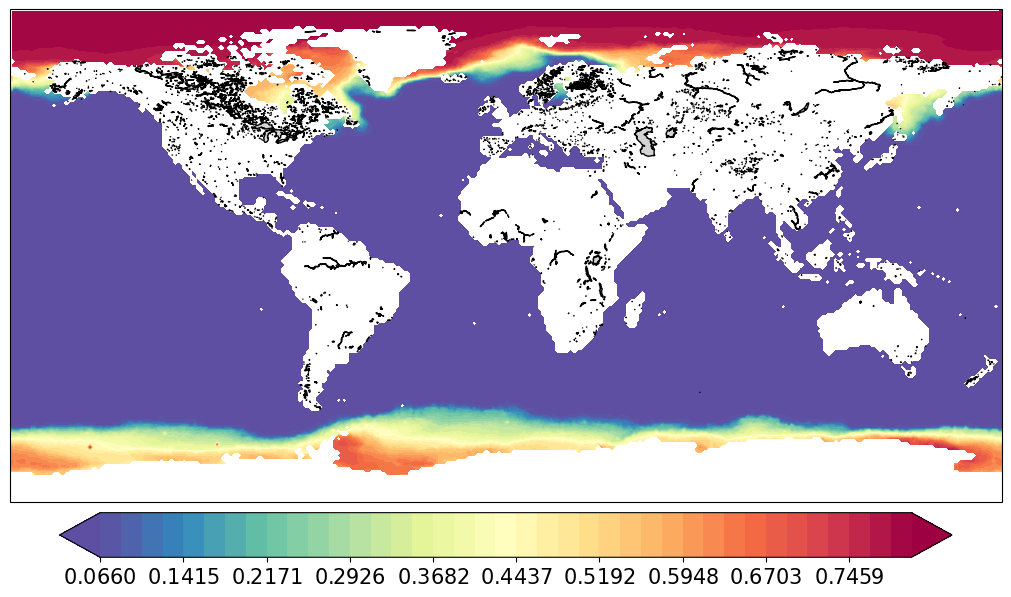

In [16]:
pf.plot(mesh, data_mean[:].values)

[<GeoAxes: >]

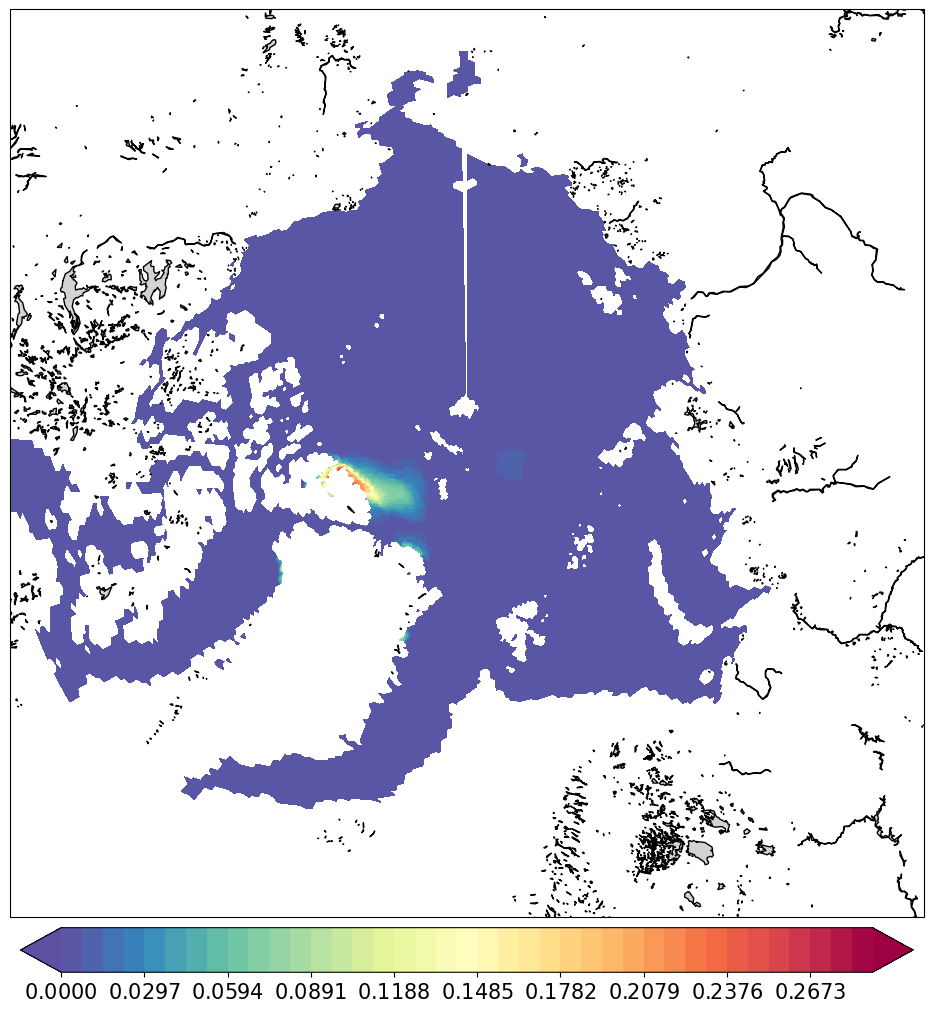

In [33]:
pf.plot(mesh, data[].values, mapproj='np', box=[-180, 180, 60, 90])

[<GeoAxes: >]

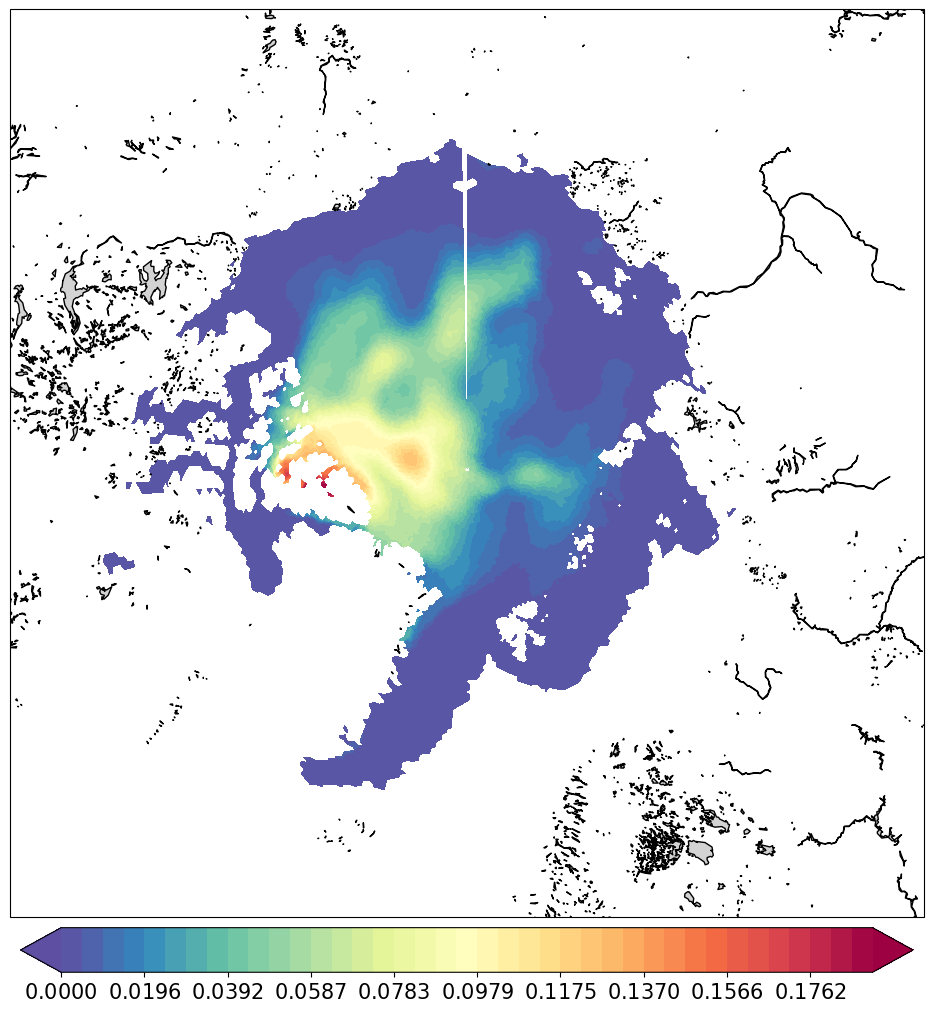

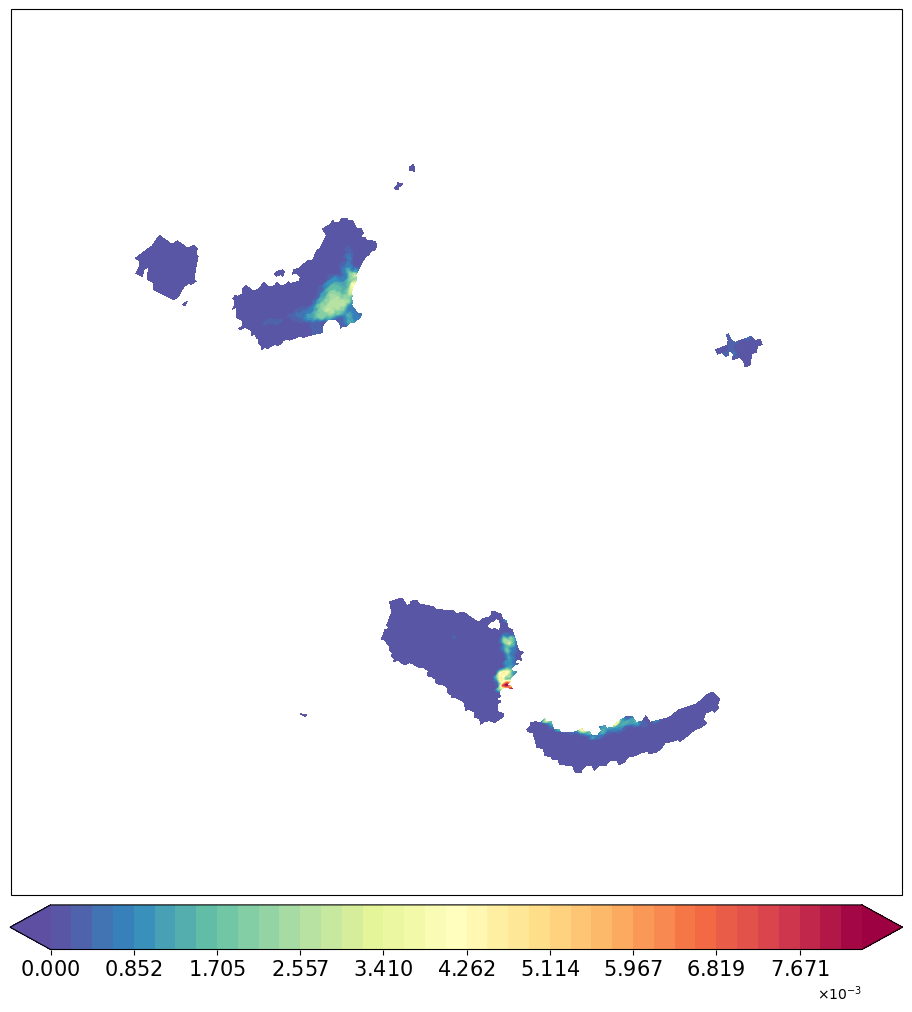

In [46]:

pf.plot(mesh, data[8].values, mapproj='np', box=[-180, 180, 60, 90])
pf.plot(mesh, data[2].values, mapproj='sp', box=[-180, 180, -90, -60])

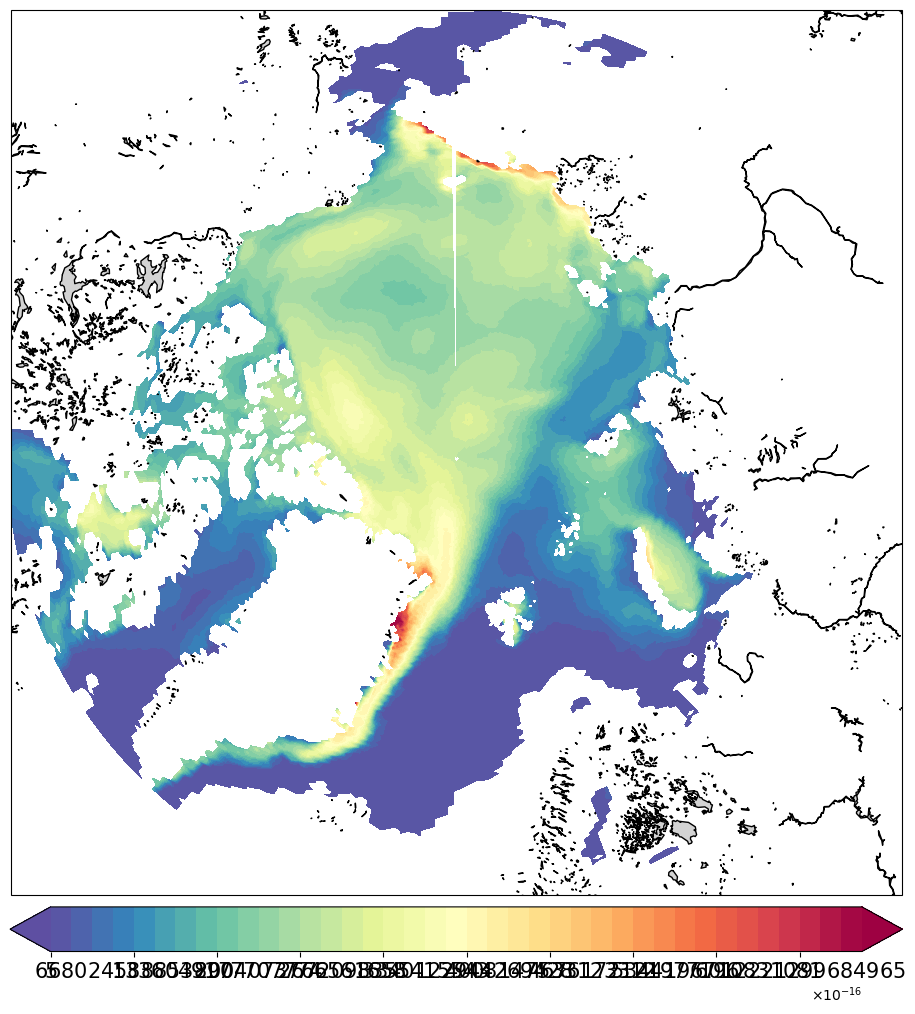

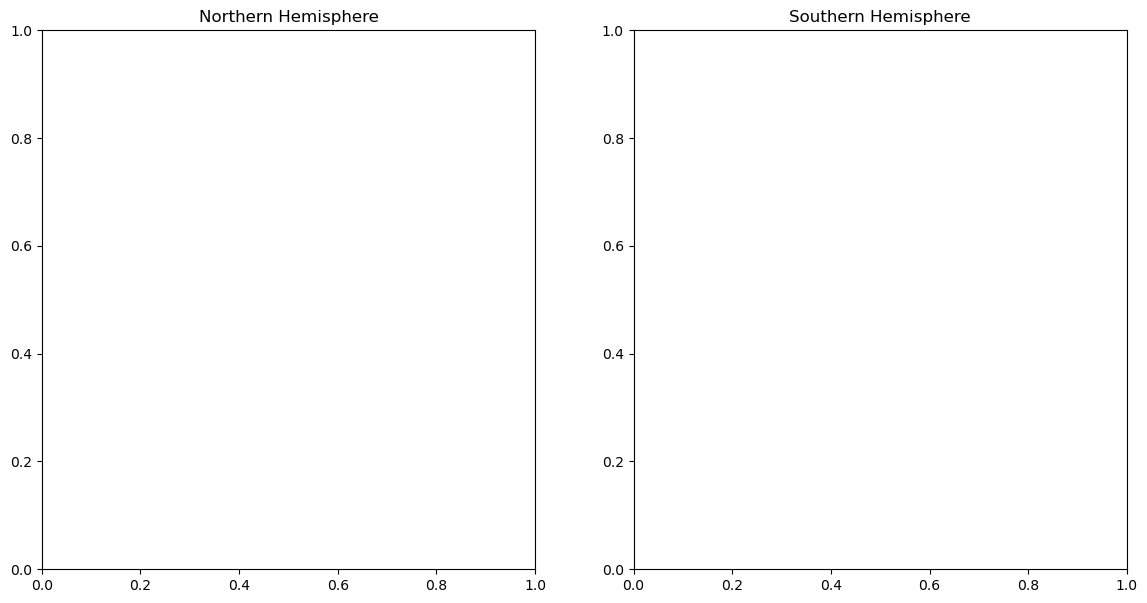

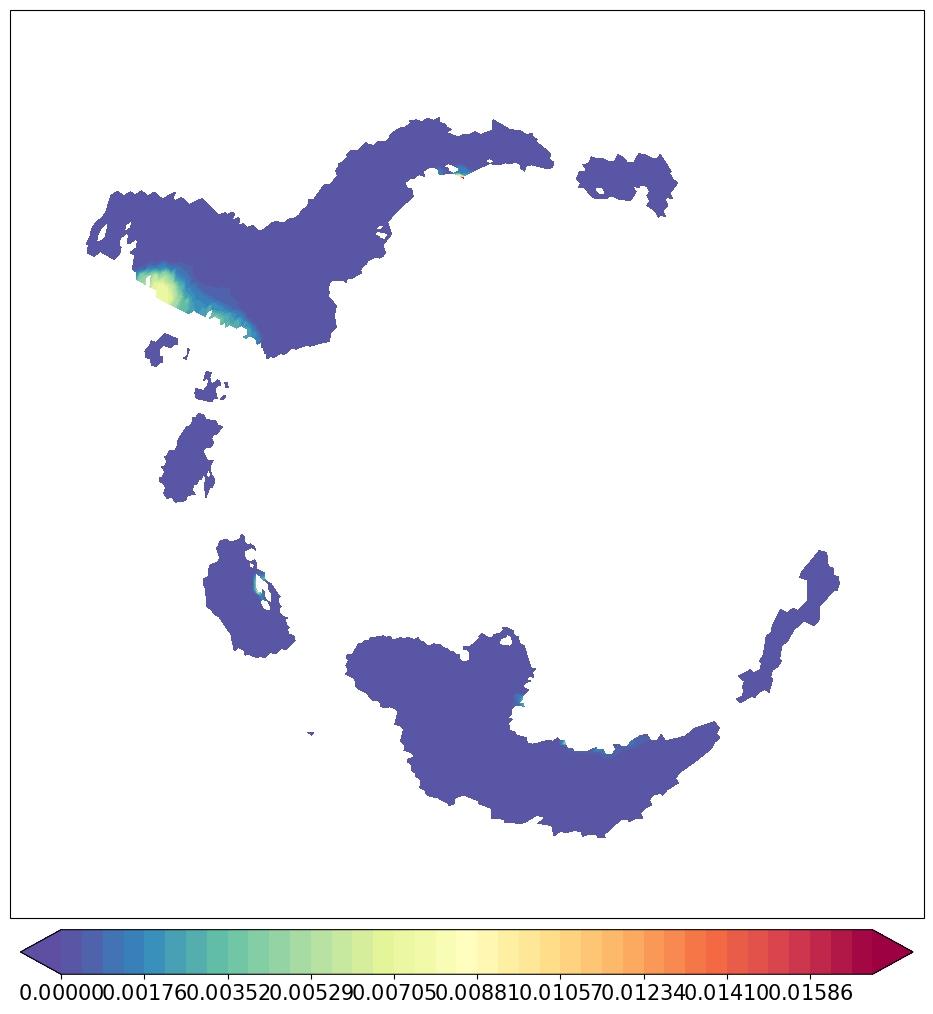

In [38]:
import matplotlib.pyplot as plt
import pyfesom2 as pf

# Create a figure
fig = plt.figure(figsize=(14, 7))

# Northern Hemisphere
ax1 = fig.add_subplot(1, 2, 1)
plt.sca(ax1)  # Set the current axis
pf.plot(mesh, data[mon].values, mapproj='np', box=[-180, 180, 60, 90])
ax1.set_title('Northern Hemisphere')

# Southern Hemisphere
ax2 = fig.add_subplot(1, 2, 2)
plt.sca(ax2)  # Set the current axis
pf.plot(mesh, data[mon].values, mapproj='sp', box=[-180, 180, -90, -60])
ax2.set_title('Southern Hemisphere')

# Show the combined figure
plt.show()


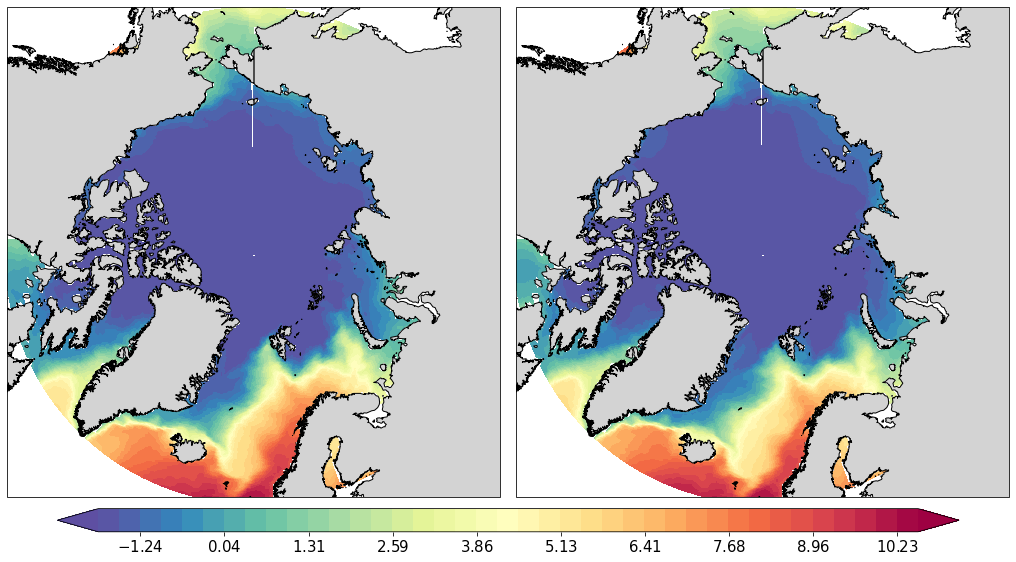

In [27]:
pf.plot(mesh, 
        [data_mean[:,0].values, data2_mean[:,0]] ,
        mapproj='np',
        box=[-180, 180, 60, 90],
       rowscol=[1,2],
       figsize=(14,8))
plt.savefig('test.png')

[<GeoAxesSubplot:title={'center':'temperature difference'}>]

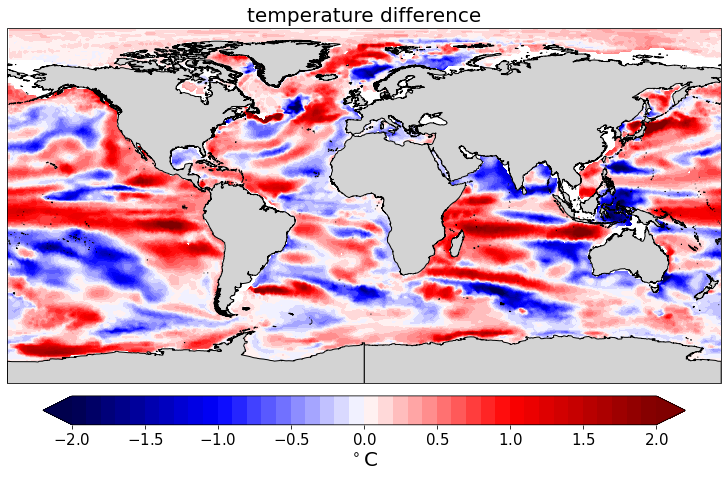

In [28]:
pf.plot(mesh, 
        data2_mean[:,11] - data_mean[:,11].values,
        cmap=cm.seismic,
        levels=(-2,2,41),
        units=r'$^\circ$C',
        titles='temperature difference',
       )

## Transect

In [29]:
temp = pf.get_data(datapath, 'temp', [1950], mesh)

Depth is None, 3d field will be returned


In [30]:
lon_start = 120
lat_start = 75
lon_end = 120
lat_end = 80
npoints   = 50
lonlat = pf.transect_get_lonlat(lon_start, lat_start, lon_end, lat_end, npoints)

<GeoAxesSubplot:>

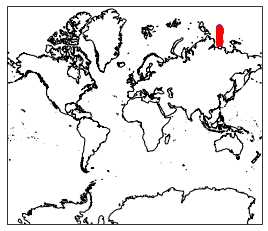

In [31]:
pf.plot_transect_map(lonlat, mesh, view='w')

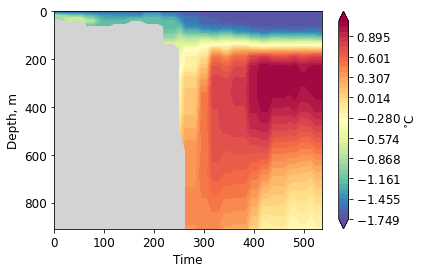

In [32]:
dist, transect_data = pf.get_transect(temp,
    mesh,
    lonlat)
pf.plot_xyz(mesh, transect_data, dist)

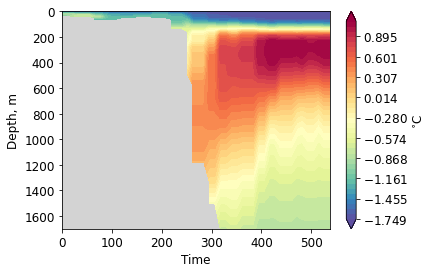

In [33]:
# dist, transect_data = pf.get_transect(temp,
#     mesh,
#     lonlat)
pf.plot_xyz(mesh, transect_data, dist, maxdepth=2000)

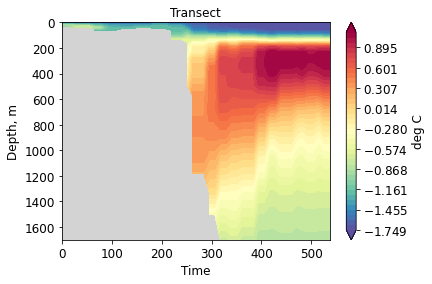

In [34]:
# dist, transect_data = pf.get_transect(temp,
#     mesh,
#     lonlat)
pf.plot_xyz(mesh, 
            transect_data,
            dist,
            maxdepth=2000,
            label="deg C",
            title="Transect")

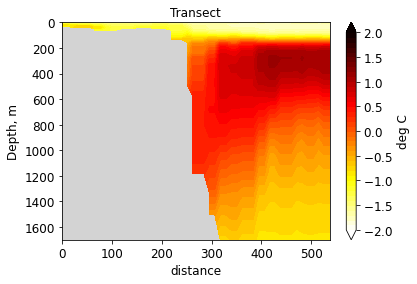

In [38]:
# dist, transect_data = pf.get_transect(temp,
#     mesh,
#     lonlat)
pf.plot_xyz(mesh, 
            transect_data,
            dist,
            maxdepth=2000,
            label="deg C",
            title="Transect",
            levels=np.linspace(-2,2, 41),
            cmap=cm.hot_r, 
            xlabel='distance'
           )

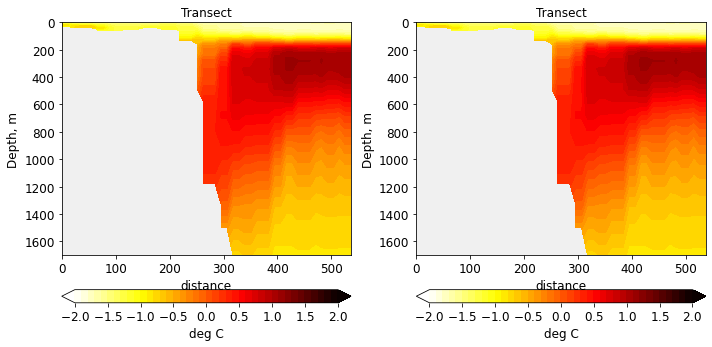

In [39]:
pf.plot_xyz(mesh, 
    [transect_data, transect_data],
    dist,
    maxdepth=2000,
    label="deg C",
    title="Transect",
    levels=np.linspace(-2,2, 41),
    cmap=cm.hot_r,
    ncols=2,
    figsize=(10,5),
    facecolor='#f0f0f0',
    xlabel='distance'
)

## U/V transect

In [40]:
u = pf.get_data(datapath, 'u', [1955], mesh)
v = pf.get_data(datapath, 'v', [1955], mesh)

Depth is None, 3d field will be returned
Depth is None, 3d field will be returned


In [41]:
u.shape

(244659, 47)

In [42]:
u_nodes = pf.tonodes3d(u, mesh)
v_nodes = pf.tonodes3d(v, mesh)

In [43]:
lon_start = 120
lat_start = 75
lon_end = 120
lat_end = 80
lonlat = pf.transect_get_lonlat(lon_start, lat_start, lon_end, lat_end, npoints)

In [44]:
dist, rot_u, rot_v = pf.get_transect_uv(u_nodes, v_nodes, mesh, lonlat, myangle=0)

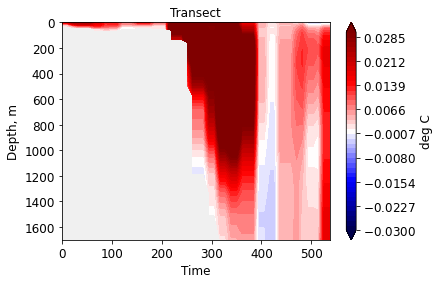

In [45]:
pf.plot_xyz(mesh, 
    rot_u,
    dist,
    maxdepth=2000,
    label="deg C",
    title="Transect",
    levels=np.round(np.linspace(-0.03, 0.03, 42),4),
    cmap=cm.seismic,
    ncols=2,
    figsize=(10,5),
    facecolor='#f0f0f0'
)

# Diagnostics

Collection of diagnostics to easily repeat OMIP2 exersizes.

In [46]:
import pyfesom2 as pf

In [48]:
mesh = pf.load_mesh('/Users/nkolduno/PYTHON/DATA/core2/')

/Users/nkolduno/PYTHON/DATA/core2/pickle_mesh_py3_fesom2
The usepickle == True)
The pickle file for FESOM2 exists.
The mesh will be loaded from /Users/nkolduno/PYTHON/DATA/core2/pickle_mesh_py3_fesom2


### Sea ice integrals

In [49]:
a_ice = pf.get_data('../../DATA/LCORE2/', 'a_ice', range(1948,1957), mesh, how=None, compute=False)

Depth is None, 3d field will be returned


In [50]:
a_ice

<xarray.DataArray 'a_ice' (time: 108, nod2: 126858)>
dask.array<concatenate, shape=(108, 126858), dtype=float32, chunksize=(12, 126858), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1948-01-31T23:15:00 ... 1956-12-30T23:15:00
Dimensions without coordinates: nod2
Attributes:
    description:  ice concentration
    long_name:    ice concentration
    units:        %

In [51]:
ice_area = pf.ice_area(a_ice, mesh,)
ice_ext = pf.ice_ext(a_ice, mesh)

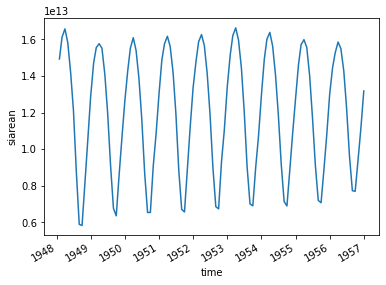

In [52]:
ice_area.plot()

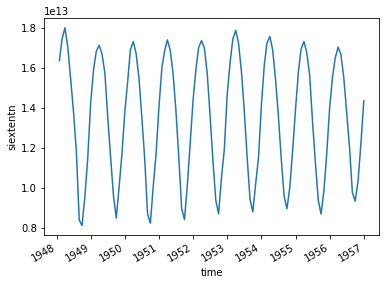

In [53]:
ice_ext.plot()

### hovmoller diagram

In [55]:
data = pf.get_data('../../DATA/LCORE2/', 'temp', range(1948,1957), mesh, how="ori", compute=False )

Depth is None, 3d field will be returned


In [56]:
vol = pf.hovm_data(data, mesh)

/Users/nkolduno/miniconda3/envs/pyfesom2/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


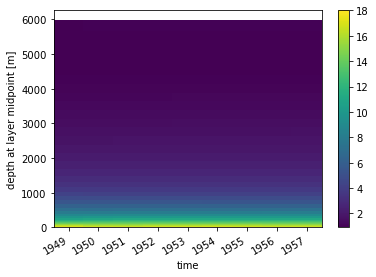

In [57]:
vol.T.plot()

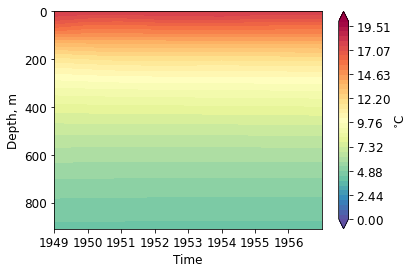

In [58]:
pf.plot_xyz(mesh, vol.T.data.T, vol.time.data, levels=np.linspace(0, 20, 42))

### Volume weighted means

In [59]:
temperature_0_500 = pf.volmean_data(data, mesh, [0, 500])

Upper depth: 0.0, Lower depth: -490.0


In [60]:
temperature_0_500

<xarray.DataArray 'temp' (time: 9)>
dask.array<truediv, shape=(9,), dtype=float64, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1948-12-30T23:15:00 ... 1956-12-30T23:15:00
    nz1      float64 535.0

In [61]:
temperature_500 = pf.volmean_data(data, mesh, [500, 500])

Upper depth: -490.0, Lower depth: -490.0


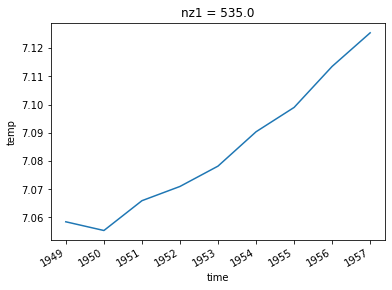

In [62]:
temperature_500.plot()

# Low level functions

## Getting the data

Main function `get_data` from `load_mesh_data.py`:

```python
    get_data(
        result_path,
        variable,
        years,
        mesh,
        runid="fesom",
        records=-1,
        depth=None,
        how="mean",
        ncfile=None,
        compute=True,
        continuous=False,
        **kwargs
        )
```
Mainly wraper around `xarray.open_mfdataset`, plus some default aggregation operations.


## Interpolation

Main function is `fesom2regular` from `regriding.py`:

```python
    fesom2regular(
        data,
        mesh,
        lons,                 # regular 2d
        lats,                 # regular 2d 
        distances_path=None,  # we store interpolation weights
        inds_path=None,       # we store interpolation weights
        qhull_path=None,      # we store interpolation weights
        how="nn",             # several types of interpolation, KDTree based and from scipy
        k=5,
        radius_of_influence=100000, # can be dificult for meshes with very different resolutions
        n_jobs=2,             # can be parallel
        dumpfile=True,        # we store interpolation weights
        basepath=None,        # we store interpolation weights
    ):
```

Variables on elements are first interpolated to nodes and then to regular grid for plotting:

    tonodes
    tonodes3d

    

## Selection

### Collection of individual points (e.g. transect)

We initially work with some collection of points. Usually it's a straight line, generated by `transect_get_lonlat` function from start and end point coordinates, as well as the number of points in between. However it can be just collection of any points.

- Select model mesh nodes that are closest to the "observational" points. Use the `tunnel_fast1d` function. This is a serial process (one point at a time), and for large meshes is slow. Can be optimised. The result is `nodes[number_of_nodes]` variable with boolian values, that are true, if the node is selected (closest to "observations").

- Select nodes from FESOM2 3D data (`data3D[number_of_nodes, number_of_levels]`) by doing `transect_data = data3d[nodes, :]`

- Mask nodes that are too far away (`max_distance`) from original points (e.g. points are on land).

## Area

If you would like to select data according to some predefined mask, you can use `get_mask` function:

In [63]:
mask = pf.get_mask(mesh, "Atlantic_Basin")

You will get the mask for 2D nodes with `True` for nodes inside the region. Options at the moment are:

    Available regions:
            Ocean Basins:
                "Atlantic_Basin"
                "Pacific_Basin"
                "Indian_Basin"
                "Arctic_Basin"
                "Southern_Ocean_Basin"
                "Mediterranean_Basin"
                "Global Ocean"
                "Global Ocean 65N to 65S"
                "Global Ocean 15S to 15N"
            MOC Basins:
                "Atlantic_MOC"
                "IndoPacific_MOC"
                "Pacific_MOC"
                "Indian_MOC"
            Nino Regions:
                "Nino 3.4"
                "Nino 3"
                "Nino 4"
            Arctic Ocean regions:
                "Amerasian basin"
                "Eurasian basin"

You can also just select nodes by lon/lat bounds, and get them from the data:

In [64]:
box=[-160, -147, 71, 73] 
left, right, down, up = box
mask_al = ((mesh.x2 >= left) & 
           (mesh.x2 <= right) & 
           (mesh.y2 >= down) & 
           (mesh.y2 <= up))

In [65]:
temp = pf.get_data(datapath, 'temp', [1950], mesh)

Depth is None, 3d field will be returned


In [66]:
temp.shape

(126858, 47)

In [67]:
temp[mask_al,:].shape

(182, 47)

#### Weighted area mean

We need areas associated with each node at each level. For this additional `meshdiag` file is loaded. It is generated before the first timestep of the model cold start, and usually available in the mesh path.

In [68]:
meshdiag = pf.get_meshdiag(mesh)

We only need `nod_area` from this file:

In [69]:
nod_area = np.ma.masked_equal(meshdiag.nod_area.values, 0)

In [70]:
temp_by_area = ((np.ma.masked_equal(temp[mask_al,:],0) * nod_area[:-1,:].T[mask_al]).mean(axis=0))

In [71]:
temp_weighted = temp_by_area/nod_area[:-1,:].T[mask_al].mean(axis=0)

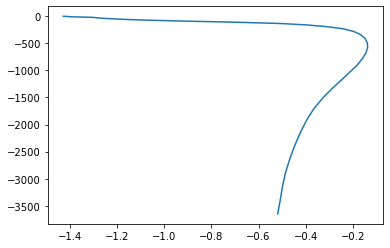

In [72]:
plt.plot(temp_weighted, mesh.zlev[:-1],)

Vertical integral:

In [73]:
(temp_weighted[:]*np.diff(mesh.zlev[:]*-1)).sum()

-1505.057248399427

Weighted mean

In [74]:
((temp_weighted[:]*np.diff(mesh.zlev[:]*-1)).sum())/np.diff(mesh.zlev[:]*-1).sum()

-0.24080915974390832

### Cutting elements

There is `cut_region` function, that allows you to get elements confined by the boundidn box.